<a href="https://colab.research.google.com/github/Clement-nshimiyimana/AMMI-first-week/blob/master/Clement_AMMI_Torchvision_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Outlines
===================
- Dataset
- Transforms
- Dataloader




Until now, we have dealt with image sets that could fit in memory, and we
manipulated them as regular tensors, e.g.

In [4]:
import torchvision
from torchvision import datasets

In [6]:
train_set = torchvision.datasets.MNIST('./data/mnist/', train = True, download = True)
train_input = train_set.data.view(-1, 1, 28, 28).float()
train_targets = train_set.targets

    
However, large sets do not fit in memory, and samples have to be constantly
loaded during training.
This require to parallelize the loading itself, but also
the normalization, and data-augmentation operations.


PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that 
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model.




Loading a Dataset
-------------------

Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes: **['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**


<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' />


You can find all the available datasets on torchvision in this [link](https://pytorch.org/vision/stable/datasets.html)

In [ ]:
from torchvision import datasets
# datasets.

Here is an example of how to load the `Fashion-MNIST` dataset from TorchVision:

We will load the `FashionMNIST` Dataset with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

### Transforms
- In many cases we need to apply transformations to our training set e.g normalizations.
- transforms.Compose([]) allows composing series of transforms from these custom transforms.
- torchvision package provides some common transforms as well
such as **transforms.Normalize((mean), (std))**, and **transforms.ToTensor()**.

We can import it by **import torchvision.transforms as transforms**

In [7]:
import torchvision.transforms as transforms

my_transforms = transforms.Compose([
     transforms.CenterCrop(100),
     transforms.ToTensor(), ])

In [8]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=my_transforms
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=my_transforms,
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(100, 100))
               ToTensor()
           )

In [ ]:
len(training_data)

60000

Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.



In [ ]:
training_data[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 9)

In [ ]:
training_data[0][0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
training_data[0][1]

9

torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])


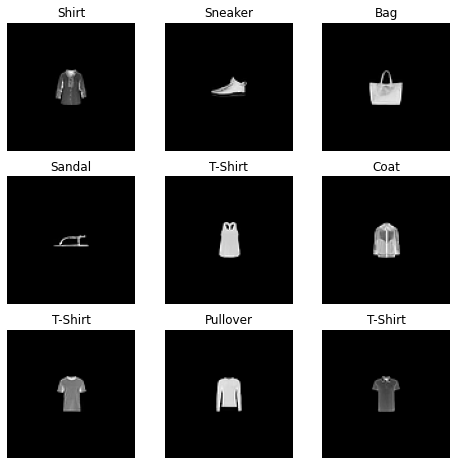

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(img.shape)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

--------------




Creating a Custom Dataset for your files
---------------------------------------------------
### torch.utils.data.Dataset
Abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
- `__len__` so that len(dataset) returns the size of the dataset.
- `__getitem__` to support the indexing such that dataset[i] can be used to get ii\ th sample and the `__init__` funtcion.

Take a look at this implementation; the FashionMNIST images are stored 
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``. 

In the next sections, we'll break down what's happening in each of these functions.



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


In [18]:
img_dir = '/content/drive/MyDrive/data_new/Img_dir'
annotations_file_path = '/content/drive/MyDrive/data_new/labels.csv'

annotations = pd.read_csv(annotations_file_path)
annotations.head()

,Image_name,label
0,w_00001090.JPG,0
1,w_w_06 (2).jpg,0
2,w_w_00000659.jpg,0
3,w_w_00001081.jpg,0
4,w_00000276.JPG,0


In [16]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = (image, label)
        return sample

__init__


The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms.


In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

__len__

The __len__ function returns the number of samples in our dataset.

Example:



In [ ]:
def __len__(self):
    return len(self.img_labels)

__getitem__

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``. 
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the 
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the 
tensor image and corresponding label in a tuple.



In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:(image, label)
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = (image, label)
    return sample

Usually we load the data in `__init__` but leave the reading of the images to `___getitem___`.
This is memory efficient because all the images are not stored in the memory at once but read as
required.

In `__getitem___` you choose the way you want to form your training sample, i.e it can be of any convenient
shape or data structure
- Our dataset will take an optional argument transform so that any required processing can be applied on the
sample.


--------------




In [19]:
## Using our custom dataset
custom_dataset = CustomImageDataset(annotations_file_path, img_dir, )
custom_dataset[2][0].shape

torch.Size([3, 452, 361])

In [20]:
custom_dataset[20][0].shape

torch.Size([3, 449, 800])

Preparing your data for training with DataLoaders
-------------------------------------------------

##torch.utils.data.DataLoader

- Combines a dataset and a sampler, and provides an iterable over the given dataset, supports:
- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.
PyTorch provides an easy switch to perform multi-process data loading by simply setting the
argument num_workers to a positive integer.
Having more workers will increase the memory and the loading process will be faster.
- dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)


``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [21]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [22]:
train_dataloader_ = DataLoader(custom_dataset, batch_size=32, shuffle=True, num_workers=2)

In [26]:
image, target = next(iter(train_dataloader))
image.shape

torch.Size([64, 1, 100, 100])

In [ ]:
for i, batch in enumerate(train_dataloader):
    image, target = batch
    print('images: ', image.shape)
    print('targets: ',target)

    if i == 2:
        break

images:  torch.Size([64, 1, 100, 100])
targets:  tensor([7, 8, 9, 1, 2, 3, 5, 8, 6, 3, 9, 3, 3, 6, 0, 0, 5, 6, 9, 2, 5, 0, 5, 1,
        7, 1, 3, 9, 7, 7, 2, 4, 5, 2, 1, 6, 7, 1, 3, 8, 4, 9, 4, 2, 4, 7, 4, 3,
        3, 0, 6, 4, 6, 2, 2, 2, 1, 1, 9, 6, 4, 5, 9, 4])
images:  torch.Size([64, 1, 100, 100])
targets:  tensor([5, 9, 0, 9, 9, 7, 6, 2, 6, 8, 0, 0, 7, 9, 8, 2, 2, 4, 6, 8, 5, 3, 0, 0,
        5, 4, 2, 6, 9, 0, 9, 2, 6, 6, 9, 4, 3, 0, 9, 0, 8, 7, 6, 4, 0, 7, 1, 6,
        6, 6, 1, 3, 6, 1, 9, 6, 1, 3, 0, 6, 3, 2, 2, 5])
images:  torch.Size([64, 1, 100, 100])
targets:  tensor([2, 6, 8, 5, 5, 6, 8, 8, 0, 5, 6, 8, 1, 5, 9, 7, 6, 8, 8, 8, 5, 4, 6, 2,
        3, 1, 1, 6, 8, 9, 2, 5, 8, 7, 0, 7, 5, 7, 2, 9, 1, 8, 2, 5, 0, 2, 5, 6,
        2, 1, 1, 1, 8, 9, 5, 9, 3, 7, 0, 6, 9, 6, 4, 0])


## Solution

In [27]:
my_transforms = transforms.Resize((28, 28))

custom_dataset = CustomImageDataset(annotations_file_path, img_dir, transform=my_transforms)
custom_dataset[20][0].shape

torch.Size([3, 28, 28])

In [28]:
train_dataloader_ = DataLoader(custom_dataset, batch_size=4, shuffle=True)

In [29]:
for i, batch in enumerate(train_dataloader_):
    image, label = batch
    print(image.shape, label)

    if i==3:
        break

torch.Size([4, 3, 28, 28]) tensor([0, 0, 0, 1])
torch.Size([4, 3, 28, 28]) tensor([1, 0, 0, 0])
torch.Size([4, 3, 28, 28]) tensor([0, 0, 0, 0])
torch.Size([4, 3, 28, 28]) tensor([1, 1, 0, 0])


- Dataloader needs the dataset to iterate on it.

- Transform help to do any transformations in our dataset.

- Samplers: tells the dataloader in which order it will trait the dataset.

- DataLoader supports automatically collating individual fetched data samples into batches via arguments batch_size.

Iterate through the DataLoader
--------------------------

We have loaded that dataset into the ``Dataloader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels``(containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over 
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler_).



Feature batch shape: torch.Size([64, 1, 100, 100])
Labels batch shape: torch.Size([64])


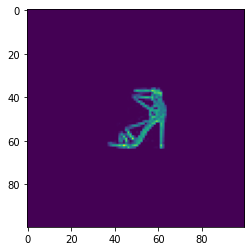

Label: 5
Feature batch shape: torch.Size([64, 1, 100, 100])
Labels batch shape: torch.Size([64])


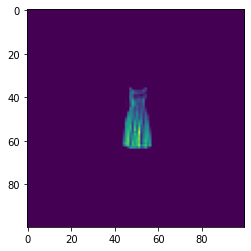

Label: 3


In [30]:
# Display image and label.

for i, batch in enumerate(train_dataloader):
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0]
    label = train_labels[0]
    plt.imshow(img.squeeze())
    plt.show()
    print(f"Label: {label}")
    if i == 1:
        break

Feature batch shape: torch.Size([4, 3, 28, 28])
Labels batch shape: torch.Size([4])


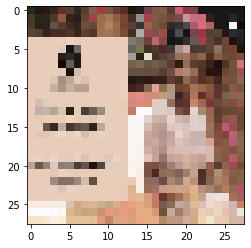

Label: 0
Feature batch shape: torch.Size([4, 3, 28, 28])
Labels batch shape: torch.Size([4])


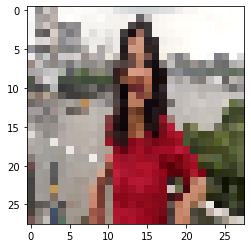

Label: 0


In [31]:
# Display image and label.

for i, batch in enumerate(train_dataloader_):
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0]
    label = train_labels[0]
    plt.imshow(img.permute(1,2, 0))
    plt.show()
    print(f"Label: {label}")
    if i == 1:
        break

**Given this train_loader, we can now re-write our training procedure with a
loop over the mini-batches**

In [32]:
import torch
import torch.nn as nn
from torch import optim

In [33]:
for i, batch in enumerate(train_dataloader):
    image, label = batch
print(image.shape)

    # if i==3:
    #     break

torch.Size([32, 1, 100, 100])


In [ ]:
#get the data

def load_data():

  #using the dataset module from torchvision
  mnist_train_set = datasets.FashionMNIST('data/fashiomnist/', train = True, download = True)
  mnist_test_set = datasets.FashionMNIST('data/fashiomnist/', train = False, download = True)

  #train data
  train_images = mnist_train_set.data.view(-1, 1, 28, 28).float()
  train_targets = mnist_train_set.targets

  #test data
  test_images = mnist_test_set.data.view(-1, 1, 28, 28).float()
  y_test = mnist_test_set.targets

  #flatten
  train_val_input = train_images.clone().reshape(train_images.size(0), -1)/255.0
  x_test = test_images.clone().reshape(test_images.size(0), -1)/255.0

  # shuffle
  N = train_val_input.shape[0]
  index = torch.randperm(N)

  #train val split
  x_train = train_val_input[index][:50000]
  y_train = train_targets[index][:50000]

  x_val = train_val_input[index][50000:]
  y_val = train_targets[index][50000:]

  return x_train, y_train, x_val, y_val, x_test, y_test

In [ ]:
x_train, y_train, x_val, y_val, _, __ = load_data()


Extracting data/fashiomnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/fashiomnist/FashionMNIST/raw



Extracting data/fashiomnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/fashiomnist/FashionMNIST/raw



Extracting data/fashiomnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/fashiomnist/FashionMNIST/raw



Extracting data/fashiomnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/fashiomnist/FashionMNIST/raw
Processing...
Done!


In [ ]:
import torchvision
import torchvision.transforms as T

train_set = datasets.FashionMNIST('data/fashiomnist/', train = True, download = True, transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]))

In [ ]:
# x_train.shape, y_train.shape, x_val.shape, y_val.shape

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
dataloader

In [ ]:
# for data in dataloader:
#   print(len(data[0]))

In [ ]:
dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/fashiomnist/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Lambda()
           )

In [ ]:
dataloader.

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
# train_set.shape

In [ ]:
for batch in dataloader:
  images, labels = batch
print(images.shape)

torch.Size([32, 784])


In [ ]:
images.shape[1]

784

In [ ]:
# image.shape[0]
h0 = images.shape[1]
h1 = 100
h2 = 50
num_classes = 10

In [ ]:
cost = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum=0.9)

In [ ]:

model = nn.Sequential(
    nn.Linear(h0, h1),
    nn.ReLU(),
    nn.Linear(h1, h2),
    nn.ReLU(),
    nn.Linear(h2, num_classes)

)
model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)

--------------




In [ ]:
model= model.to(device= device)

In [ ]:
n_epochs =  10   # set the number of epochs
losses = []

for epoch in range(n_epochs):
  
  epoch_loss = 0
  N = len(train_set) 
  for batch in dataloader:
    images, labels = batch
    # start = batch * batch_size
    # end = start + batch_size

    train_images = images
    train_labels = labels

    train_images = train_images.to(device = device)      

    outputs =  model(train_images)      

    loss =  cost(outputs, train_labels)       
    
    epoch_loss += loss.item()



    
    # compute the gradient for each weight/bias from the loss
    loss.backward()
    
    # update the model parameters
    optimizer.step()

    optimizer.zero_grad()

  epoch_loss = epoch_loss/N

  print('epoch ==> ', epoch, 'loss ==> ', epoch_loss)

  losses.append(epoch_loss)

epoch ==>  0 loss ==>  0.036053515183925626
epoch ==>  1 loss ==>  0.03605339631239573
epoch ==>  2 loss ==>  0.036053517738978066
epoch ==>  3 loss ==>  0.03605354093710581
epoch ==>  4 loss ==>  0.03605336439609528
epoch ==>  5 loss ==>  0.03605340987443924
epoch ==>  6 loss ==>  0.03605373278061549
epoch ==>  7 loss ==>  0.03605360542535782
epoch ==>  8 loss ==>  0.03605354607502619
epoch ==>  9 loss ==>  0.03605359576940537


In [ ]:
labels

tensor([0, 5, 5, 8, 6, 4, 4, 6, 9, 7, 9, 7, 0, 7, 9, 4, 2, 1, 2, 6, 0, 1, 9, 0,
        7, 5, 7, 6, 6, 5, 7, 1])

Text(0, 0.5, 'Loss')

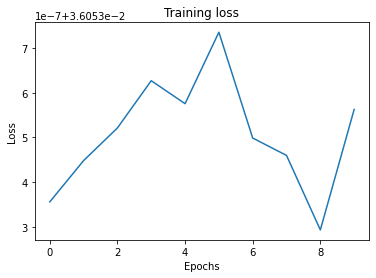

In [ ]:
plt.plot(losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
# !ls 'drive/MyDrive'

 911.csv
 AMMI_DL_Assignment_TorchNN.ipynb
 Cancer-Death-rate-Prediction-using-Multivariable-Linear-Regression-master
 Cancer-Death-rate-Prediction-using-Multivariable-Linear-Regression-master.zip
 cancer-mortality-rate.csv
 CCPP
 CCPP.zip
'Clement_nshimiyimana_CV (1).pdf'
 Clement_nshimiyimana_CV.pdf
'Colab Notebooks'
 company_sales_data.csv
'Cover Letter - Clement.docx.gdoc'
'Cover Letter - Clement.docx.pdf'
'CV Template 1.docx'
'CV Template 2.docx'
'CV Template 3.docx'
 D1.txt
 D2.txt
 Dashboard
 Data.csv
 Data_im.zip
 data.zip
'degreeAIMS (1).pdf'
 degreeAIMS.pdf
 dlc-practical-3.pdf
 dlc_practical_prologue.py
 Ex1_Deep_learning_Pytorch_Basics.pdf
'Exercises- Part2.ipynb'
 Intro_ML_Files.zip
 Lab-Exercises_2.pdf
'Letter - Clement.pdf'
 machine.data
 PyTorch_Basics_AMMI_2021.ipynb
 Second_day
 Students-Version.zip
 Template_of_scholarship_Letter.docx
 Template_of_scholarship_Letter.pages
 test_data.txt
 train_data.txt
 transcriptAIMS.pdf
 widsdatathon2021
 widsdatathon2021.zip


In [ ]:
/content/drive/MyDrive/data.zip

In [1]:
# !unzip 'drive/MyDrive/data.zip' -d drive/MyDrive/data

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = (image, label)
        return sample